In [106]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [107]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [108]:
from matplotlib import pyplot as plt

In [109]:
x = np.array([2,4,5,3,6,5,7])
y = np.array([35,60,20,50,50,55,60])

In [110]:
df = pd.DataFrame({'x':x,'y':y})

In [111]:
df.head()

,x,y
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [112]:
df.corr()

,x,y
x,1.000000,0.306795
y,0.306795,1.000000


In [115]:
x = df[['x']]
y = df[['y']]

In [54]:
x

,x
0,2
1,4
2,5
3,3
4,6
5,5
6,7


In [118]:
y

,y
0,35
1,60
2,20
3,50
4,50
5,55
6,60


In [120]:
df

,x,y
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


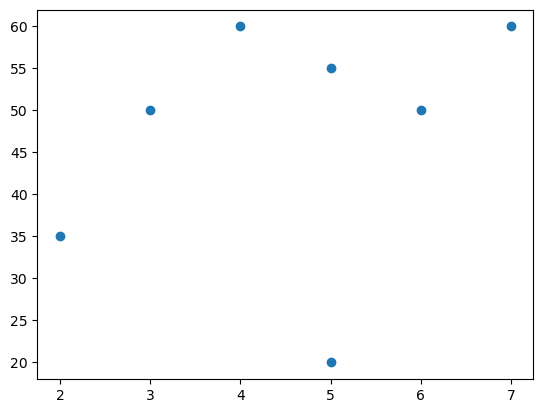

In [119]:
plt.scatter(x,y)

In [117]:
mean_x=np.mean(x)
mean_y=np.mean(y)
mean_x
mean_y

47.142857142857146

In [57]:
mean_x

4.571428571428571

In [58]:
mean_y

47.142857142857146

In [59]:
dev_x = x-mean_x
dev_y = y-mean_y


In [60]:
dev_x

,x
0,-2.571429
1,-0.571429
2,0.428571
3,-1.571429
4,1.428571
5,0.428571
6,2.428571


In [61]:
coefficient_m = np.sum((dev_x) * (dev_y))/np.sum(dev_x**2)
coefficient_m

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


x    0.0
y    NaN
dtype: float64

In [62]:
coefficient_m

x    0.0
y    NaN
dtype: float64

In [63]:
intercept = mean_y-(coefficient_m * mean_x)

In [64]:
intercept

x    47.142857
y          NaN
dtype: float64

In [65]:
prediction_for_6 = (coefficient_m * 6)+intercept
prediction_for_6

x    47.142857
y          NaN
dtype: float64

In [66]:
reg = LinearRegression()

In [67]:
reg.fit(x,y)

LinearRegression()

In [68]:
reg.coef_

array([[2.62096774]])

In [69]:
reg.intercept_

array([35.16129032])

In [73]:
reg.predict([[6]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[50.88709677]])

In [121]:
x = df[['x']]
df.head()

,x,y
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [122]:
y = df['y']

In [123]:
y

0    35
1    60
2    20
3    50
4    50
5    55
6    60
Name: y, dtype: int64

In [103]:
df['y']

0    35
1    60
2    20
3    50
4    50
5    55
6    60
Name: y, dtype: int64

# Using sklearn to perform linear regression

In [124]:
model = LinearRegression()

In [125]:
model.fit(x,y)

LinearRegression()

In [127]:
slope_sklearn = model.coef_
slope_sklearn

array([2.62096774])

In [128]:
intercept_sklearn = model.intercept_
intercept_sklearn

35.16129032258065

In [139]:
pred = model.predict(x)
pred

array([40.40322581, 45.64516129, 48.26612903, 43.02419355, 50.88709677,
       48.26612903, 53.50806452])

In [145]:
df2 = df[['pred']]
df2.head

<bound method NDFrame.head of    pred
0  pred
1  pred
2  pred
3  pred
4  pred
5  pred
6  pred>

In [130]:
df

,x,y
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [149]:
df['pred'] = model.predict(x)
df.head()

,x,y,pred,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097


# Residuals

In [147]:
df['residuals']=df['y']-df['pred']
df

,x,y,pred,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


# MSE & RMSE

In [151]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [153]:
mse = mean_squared_error(df['y'],df['pred'])
mse

167.30990783410135

In [155]:
import math
rmse = math.sqrt(mse)
rmse

12.934833119685052

In [156]:
df.to_excel('output.xlsx', index=False)